# Introduction
The goal of this project is to analyze the Electric Vehicle Population Data dataset and predict the Base MSRP of electric vehicles based on their characteristics. The dataset contains information on various electric vehicle models, including their range, battery capacity, and price.

## Problem Statement
The goal of this project is to develop a predictive model that can accurately forecast the Base MSRP of electric vehicles based on their characteristics. This model can be used by EV manufacturers, policymakers, and industry analysts to better understand the factors that influence EV pricing and to make informed decisions.
* Project Type : Supervised Learning - Regression
* Target Variable: Base MSRP

# Data Collection

## Importing necessary libraries

In [1]:
# to deactivate warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [5]:
data = pd.read_csv("E.V.csv")

In [7]:
df = pd.DataFrame(data)

In [9]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


# Data Preprocessing - Data Cleaning

In [11]:
print("Shape of the dataset is: ")
df.shape

Shape of the dataset is: 


(223995, 17)

In [13]:
print("Columns: ")
df.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [15]:
print("Dataset Information:")
print("\t")
df.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              

In [17]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [19]:
print("Unique Values: ")
print("\t")
df.nunique()

Unique Values: 
	


VIN (1-10)                                            13175
County                                                  207
City                                                    789
State                                                    48
Postal Code                                             954
Model Year                                               21
Make                                                     46
Model                                                   164
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       223995
Vehicle Location                                        952
Electric Utility                                         76
2020 Census Tract                       

## Finding missing values

In [21]:
missing_values = df.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


## Handling missing values
* For numerical features

In [23]:
# filling null values of numeric features

num_col = df.select_dtypes(include=['number']).columns
df[num_col] = df[num_col].fillna(df[num_col].mean())

* For non-numerical features

In [25]:
# filling null values of non-numeric features

non_num_col = df.select_dtypes(include=['object']).columns
df[non_num_col] = df[non_num_col].fillna("Missing")

In [27]:
# Checking for the null values after imputation
missing_values = df.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values)

Missing Values after Imputation:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### Checking for duplicates

In [29]:
print("\t")
print(f"Total number of duplicate values is : {df.duplicated().sum()}")

	
Total number of duplicate values is : 0


* The dataset has no duplicate rows; all records are unique.

## Visualizing Outliers

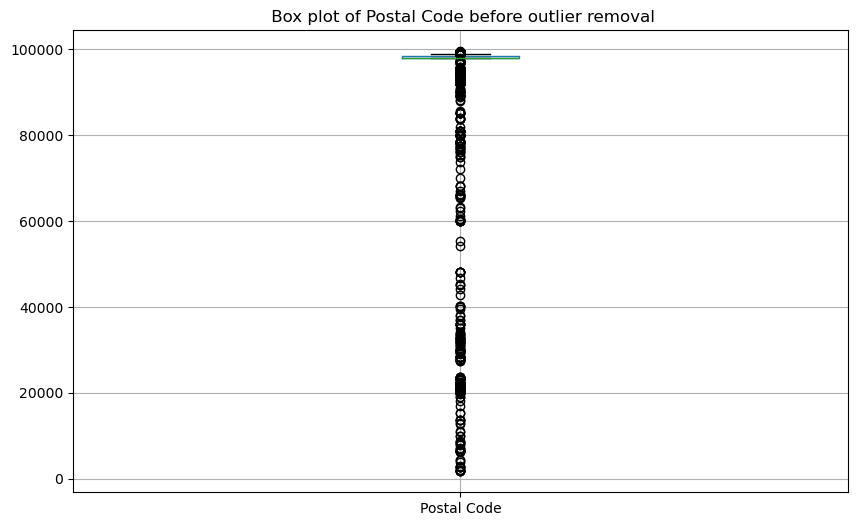

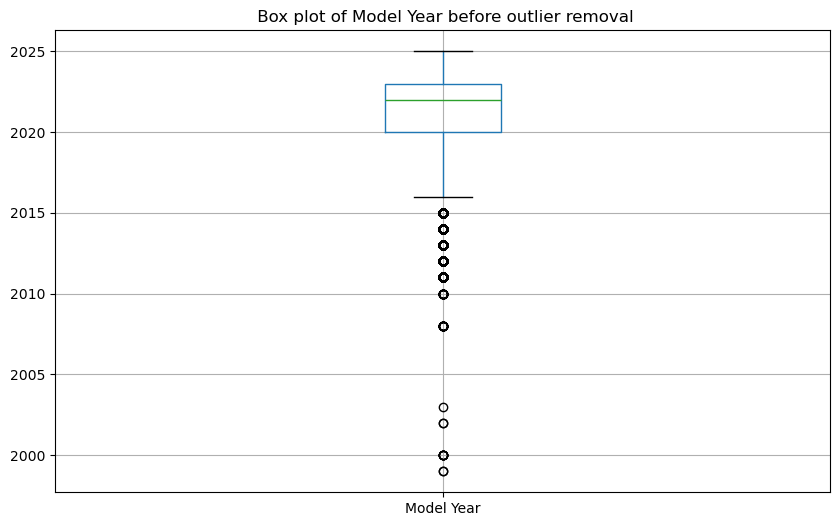

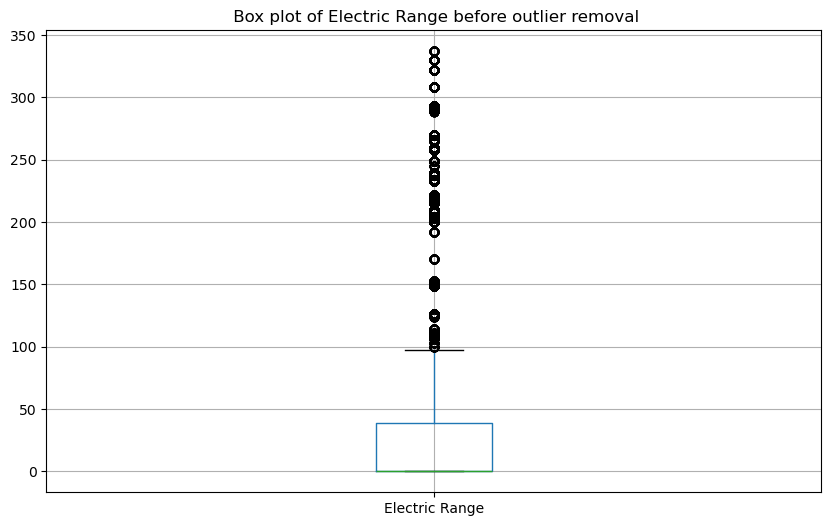

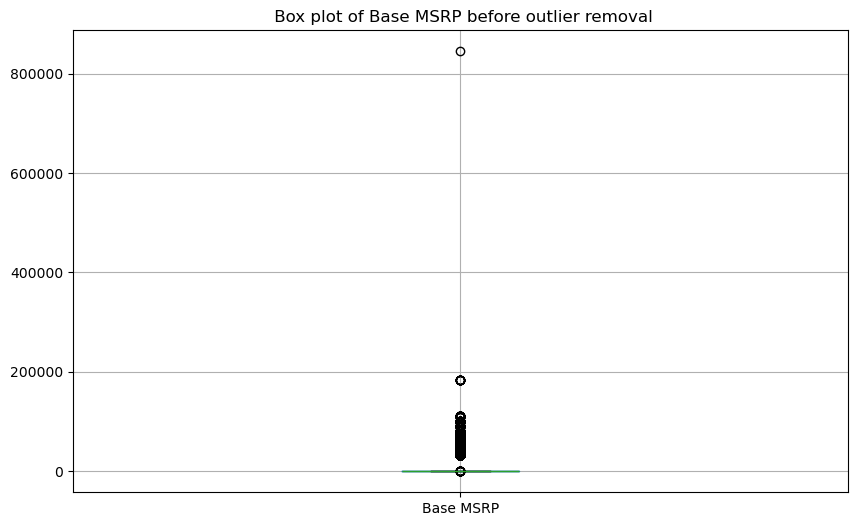

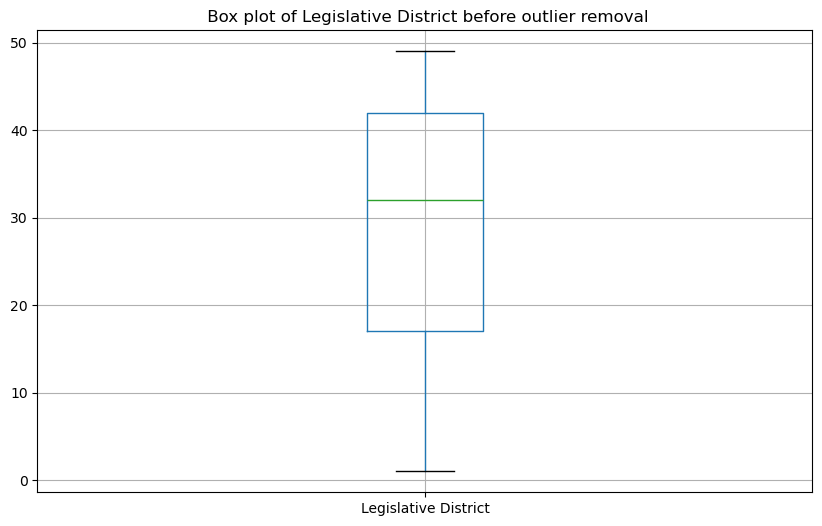

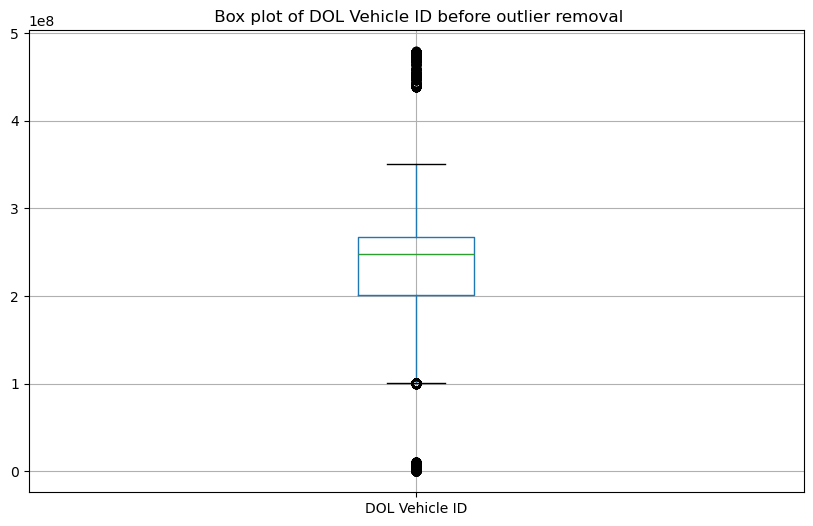

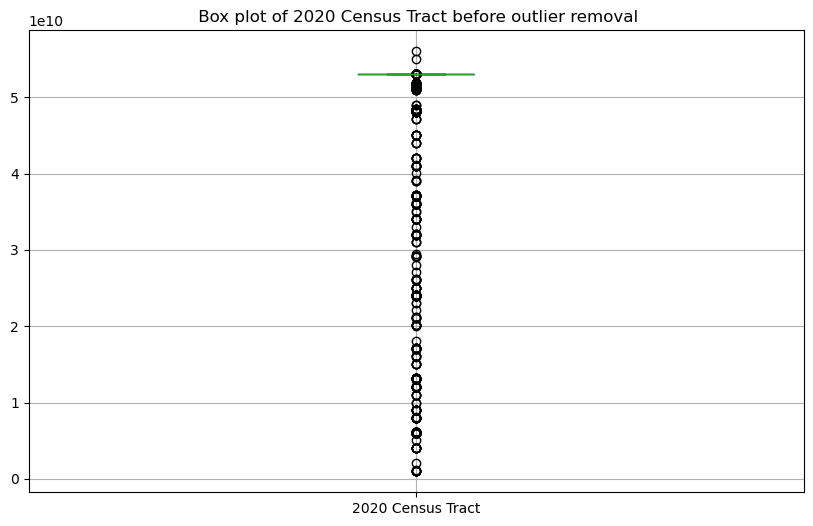

In [31]:
# Visualizing Outliers before outlier removal

num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} before outlier removal")
    plt.show()

* The dataset contains significant outliers in certain features, which may skew the model's performance and lead to biased predictions. To ensure robust and accurate modeling, applying IQR method

## Handling Outliers

In [33]:
# Outlier removal

def handle_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5* IQR
        upper = Q3 + 1.5* IQR
        df[col] = df[col].clip(lower,upper)
    return df

In [35]:
columns = df.select_dtypes(include=['number']).columns
columns = columns.drop('Base MSRP')
columns
df = handle_outlier(df,columns)

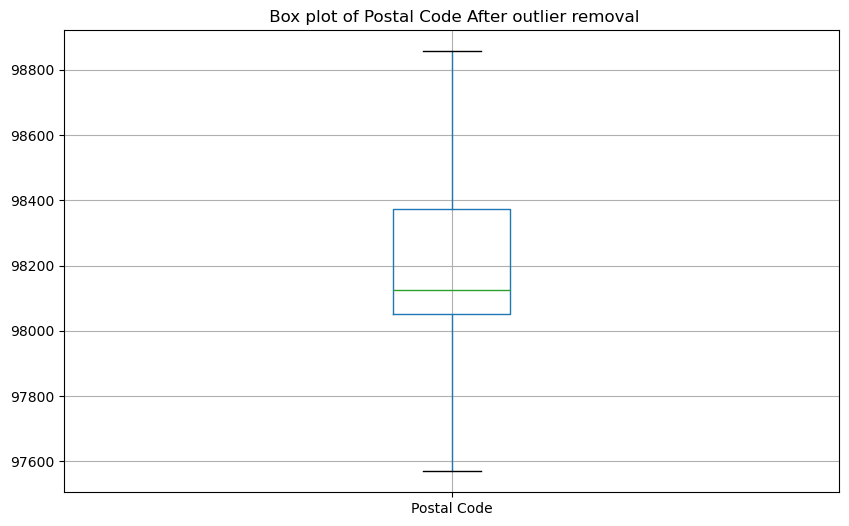

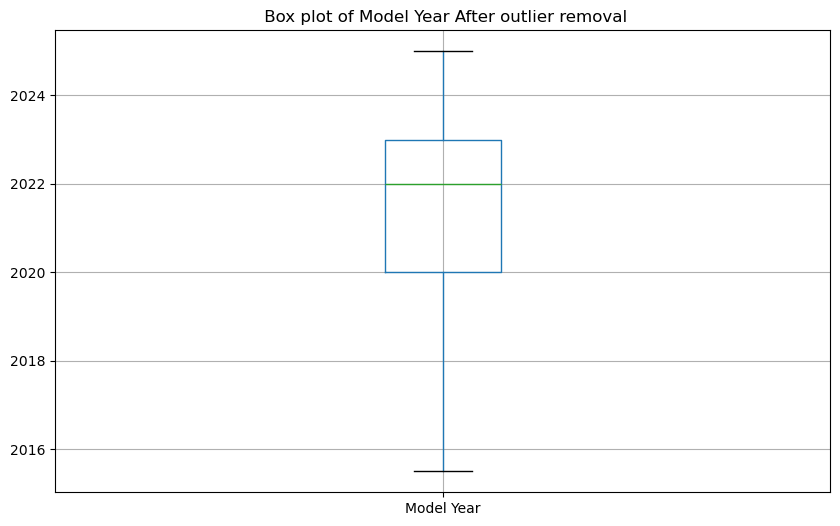

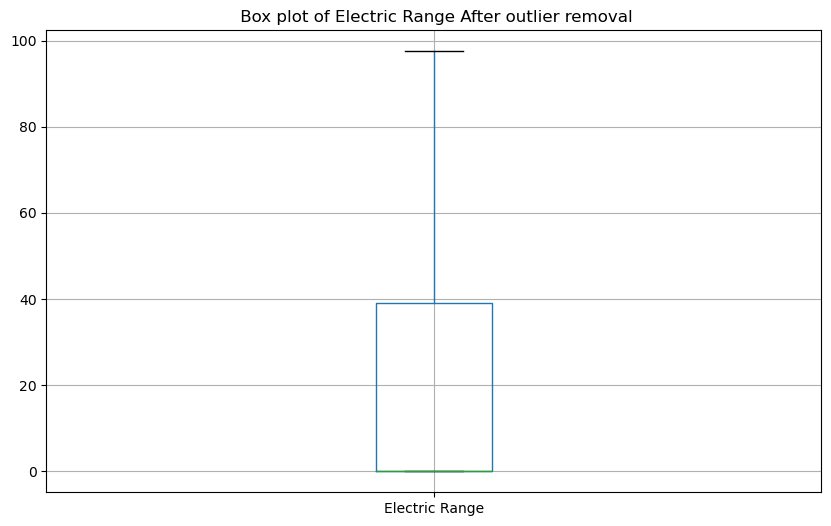

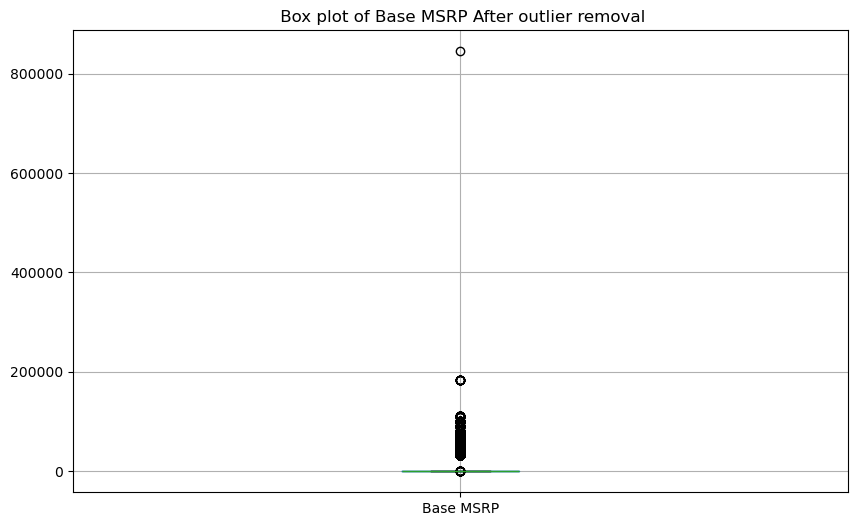

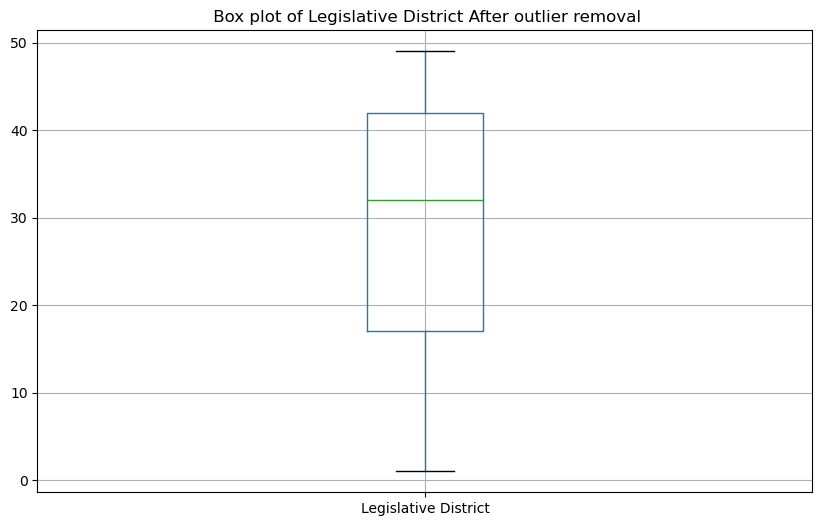

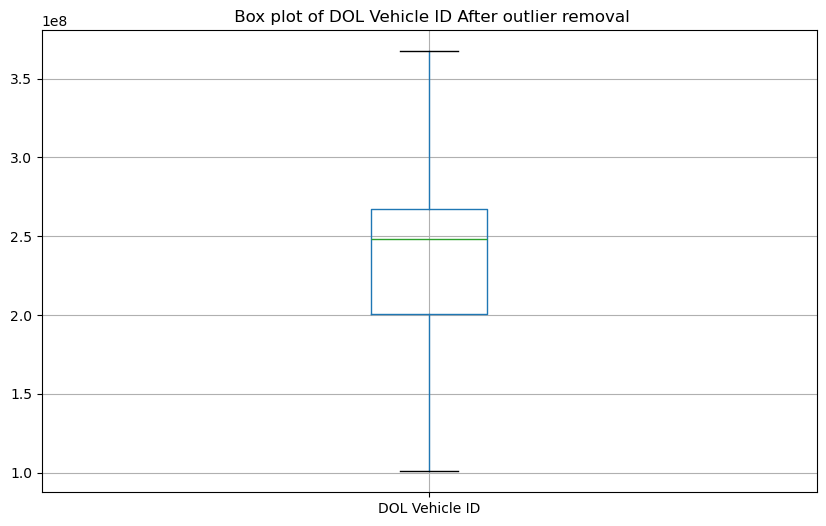

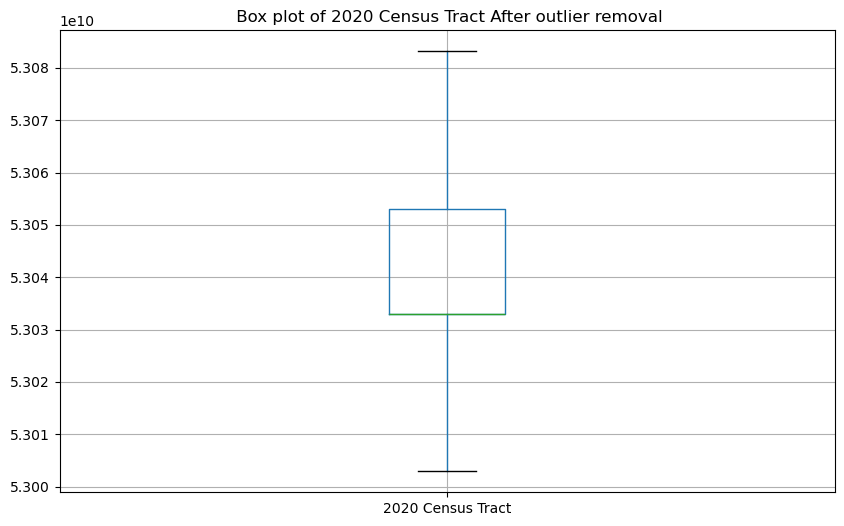

In [37]:
num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} After outlier removal")
    plt.show()

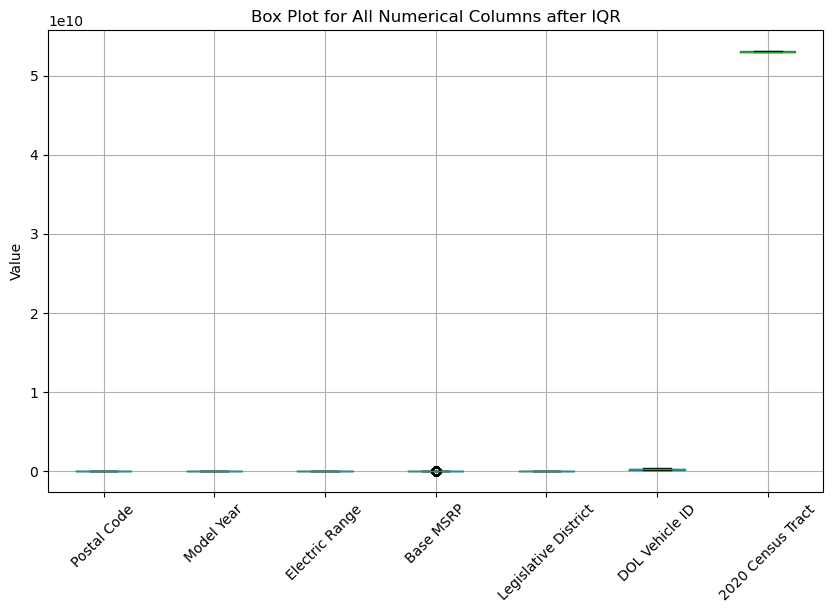

In [39]:
# Select numerical columns
columns = df.select_dtypes(include=['int64', 'float64'])

# Create a single box plot for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
columns.boxplot()
plt.title("Box Plot for All Numerical Columns after IQR")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if necessary
plt.show()

## Addressing Skewness

In [41]:
# Checking skewness
skewness = df.select_dtypes(include=['number']).skew()
skewness

Postal Code              1.081719
Model Year              -0.910147
Electric Range           1.103669
Base MSRP               15.389647
Legislative District    -0.429162
DOL Vehicle ID          -0.438849
2020 Census Tract        0.226982
dtype: float64

In [43]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print("Skewed Features are :\n", skewness[skewed_feature])

Skewed Features are :
 Postal Code        1.081719
Model Year        -0.910147
Electric Range     1.103669
Base MSRP         15.389647
dtype: float64


In [45]:
# Applying Log Transformation for the column Base MSRP 
df['Base MSRP'] = np.log1p(df['Base MSRP'])
skewness = df.select_dtypes(include=['number']).skew()
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.081719
Model Year       -0.910147
Electric Range    1.103669
Base MSRP         8.103256
dtype: float64


In [47]:
df['Model Year'] = df['Model Year'].max() - df['Model Year'] + 1
df['Model Year'] = np.log1p(df['Model Year'])

In [49]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.081719
Model Year       -0.910147
Electric Range    1.103669
Base MSRP         8.103256
dtype: float64


In [51]:
# Applying PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[skewed_feature] = pt.fit_transform(df[skewed_feature])

In [52]:
print("Skewness after applying yeo-johnson: ")
df.select_dtypes(include=['number']).skew()

Skewness after applying yeo-johnson: 


Postal Code             0.000000
Model Year              0.001130
Electric Range          0.379073
Base MSRP               8.083845
Legislative District   -0.429162
DOL Vehicle ID         -0.438849
2020 Census Tract       0.226982
dtype: float64

In [55]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,4.996004e-15,-0.454346,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,0.917729,-0.121867,23.0,2.581271e+08,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,4.440892e-16,1.022763,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.346192,-0.121867,44.0,1.009045e+08,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,-5.273559e-15,1.664829,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.303187,-0.121867,34.0,2.726977e+08,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,-2.720046e-15,1.022763,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.346192,-0.121867,37.0,3.672929e+08,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,2.431388e-14,1.664829,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.346192,-0.121867,15.0,2.581130e+08,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


## Label encoding

In [57]:
X_train = df.drop(['VIN (1-10)', 'Base MSRP'], axis=1)
y_train = df['Base MSRP']

In [59]:
cat_col = X_train.select_dtypes(include = ['object'])
le = LabelEncoder()
for col in cat_col.columns:
    X_train[col] = le.fit_transform(X_train[col])

## Exploratory Data Analysis (EDA)

In [61]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [63]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,0.035907,0.066033,-0.001400,-0.395615,0.004562,0.037613
Model Year,0.035907,1.000000,0.626801,0.174814,0.017897,-0.394916,0.002384
Electric Range,0.066033,0.626801,1.000000,0.140762,-0.017453,-0.192780,-0.003272
Base MSRP,-0.001400,0.174814,0.140762,1.000000,0.010490,-0.049865,-0.000345
Legislative District,-0.395615,0.017897,-0.017453,0.010490,1.000000,-0.012886,-0.100454
DOL Vehicle ID,0.004562,-0.394916,-0.192780,-0.049865,-0.012886,1.000000,-0.001994
2020 Census Tract,0.037613,0.002384,-0.003272,-0.000345,-0.100454,-0.001994,1.000000


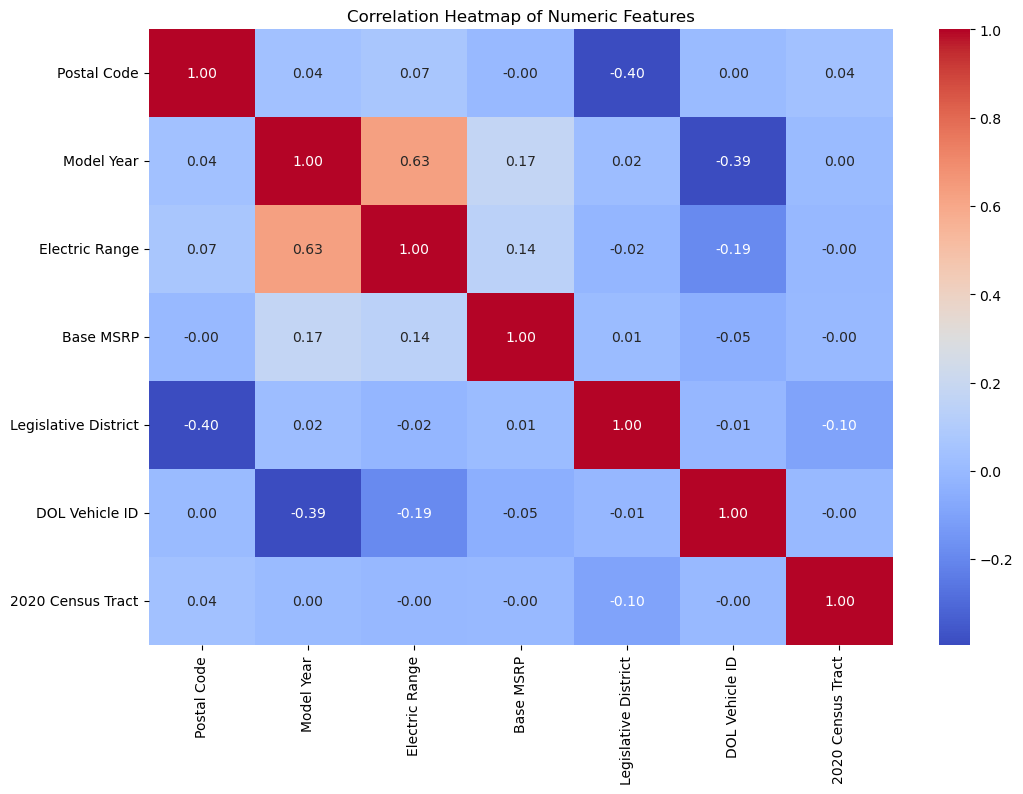

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

* The heatmap shows a clear pattern of high correlation between some features, such as:
    * Base MSRP and Electric Range
    * Model Year and Base MSRP
* Some features have low correlation with others, such as:
    * Postal Code and most other features
* There are some clusters of highly correlated features, such as:
    * Base MSRP, Electric Range, and Model Year

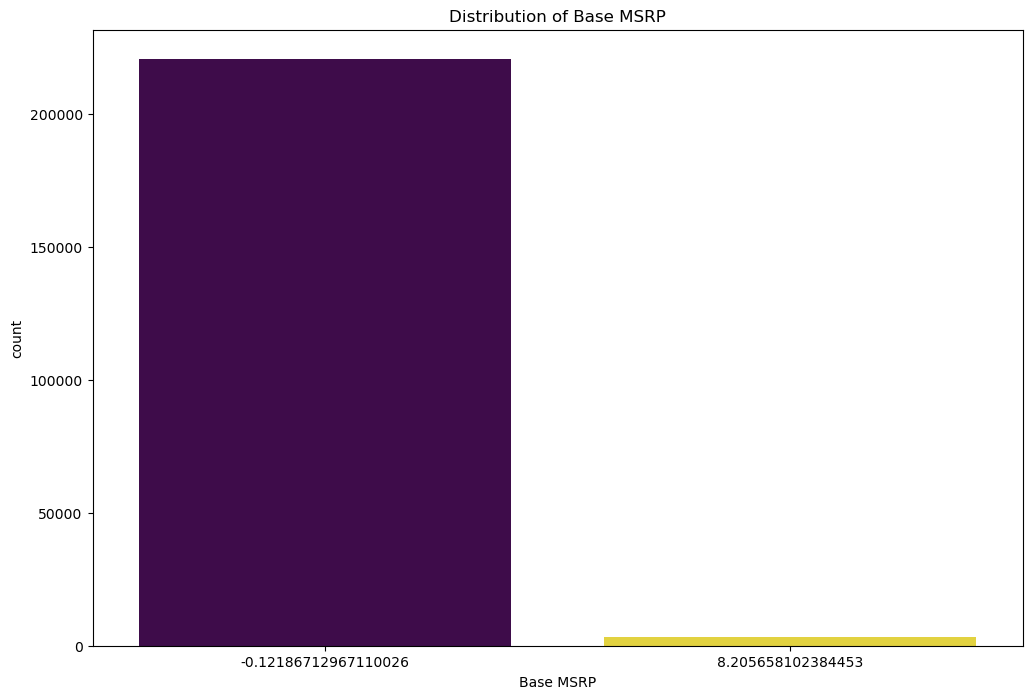

In [67]:
# Count Plot of Base MSRP
plt.figure(figsize=(12,8))
sns.countplot(x ='Base MSRP', data=df,  hue='Base MSRP', legend=False, palette='viridis')
plt.title("Distribution of Base MSRP")
plt.show()

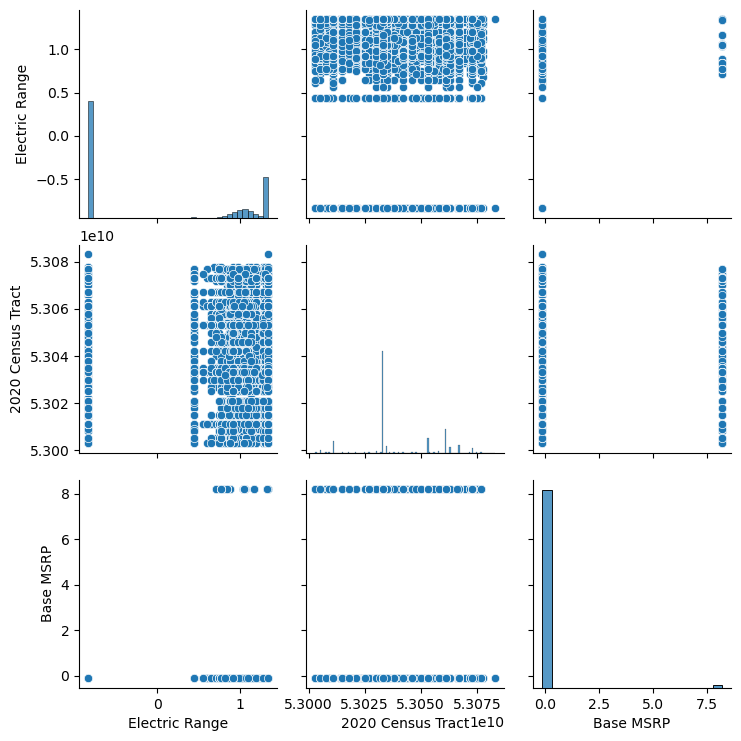

In [69]:
# Pair plot for selected features
sns.pairplot(df[['Electric Range', '2020 Census Tract', 'Base MSRP']])
plt.show()

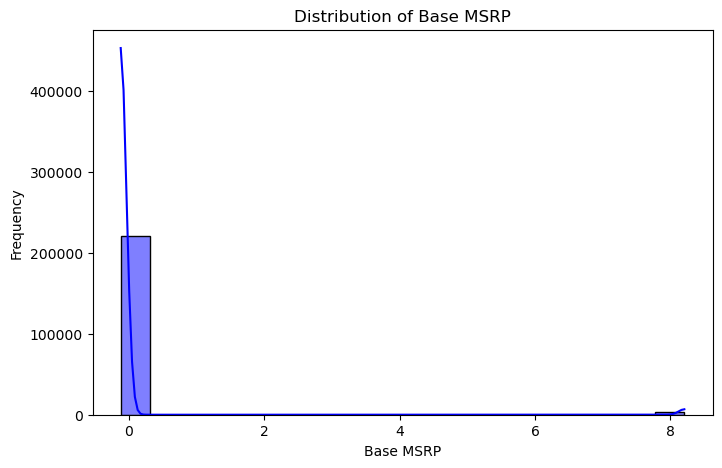

In [73]:
# Distribution of the Target Variable 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], kde=True, color='blue')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Frequency")
plt.show()

## Feature Selection

In [75]:
selector = SelectKBest(score_func = f_regression, k=10)
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
feature = X_train.columns
score = selector.scores_

feature_score = pd.DataFrame({
    'Feature' : feature,
    'Score' : score
}).sort_values(by = 'Score' , ascending = False)
selected_feature = selected_features.to_list()
print("Feature scores")
feature_score

Feature scores


,Feature,Score
4,Model Year,7060.960359
9,Electric Range,4527.900172
11,DOL Vehicle ID,558.346347
7,Electric Vehicle Type,533.983304
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,164.099900
10,Legislative District,24.650363
1,City,6.862457
12,Vehicle Location,3.789951
13,Electric Utility,2.937356
6,Model,2.243518


In [77]:
print("Selected Features")
selected_feature

Selected Features


['City',
 'Model Year',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility']

In [79]:
X_train = X_train[selected_feature]

## Feature Scaling

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Splitting the data into training and testing sets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)

# Build the ML Model:

In [85]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor()
}

# Model Evaluation:

In [87]:
result = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    result[model_name] = {
    "R2 Score" : r2,
    "MSE" : mse,
    "MAE" : mae,
    "RMSE" : rmse}
result = pd.DataFrame(result).T
print(result)

                                R2 Score       MSE       MAE      RMSE
1. Linear Regression            0.037711  0.977324  0.276322  0.988597
2. Decision Tree Regressor      0.641846  0.363750  0.044030  0.603117
3. Random Forest Regressor      0.771886  0.231678  0.047020  0.481330
4. Gradient Boosting Regressor  0.758487  0.245287  0.082436  0.495264
5. Support Vector Regressor     0.074541  0.939919  0.162720  0.969494
6. MLP Regressor                0.689581  0.315269  0.193760  0.561488


In [93]:
# Finding The Best Model
best_model = result['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(result.loc[best_model])

The best Model based on R2 Score is:
 3. Random Forest Regressor
R2 Score    0.771886
MSE         0.231678
MAE         0.047020
RMSE        0.481330
Name: 3. Random Forest Regressor, dtype: float64


# Conclusion:
The best-performing model based on the R2 Score is the Random Forest Regressor with
* R2 Score: 0.771886
* MSE: 0.231678
* MAE: 0.047020
* RMSE: 0.481330430218